# Mid-Term Group Portfolio 

## Vechicle Routing Problem Using Quantum-Inspired Evolutionary Algorithms

### Small Group Scenario with 1 depot, 2 to 10 vehicles, and 10–20 customer locations


In [9]:
import pandas as pd

#Loading the customers dataset with the Id's and coordinates 

customers = pd.read_csv("/Users/mithi/Downloads/customers.csv")

#Defining a coordinate for the depot 

depot = {"id": 0, "x": 50, "y": 50}

customers.head()


,id,x,y
0,1,63.942680,2.501076
1,2,27.502932,22.321074
2,3,73.647121,67.669949
3,4,89.217957,8.693883
4,5,42.192182,2.979722


In [10]:
import numpy as np 

#combining the depot + the customers in one 

all_points = [depot] + customers.to_dict("records")
n_points = len(all_points)
print(n_points)

51


In [11]:
#computing the distance function 

def euclidean_distance(p1, p2):
    return np.sqrt((p1['x'] - p2['x'])**2 + (p1['y'] - p2['y'])**2)

# computing the distance matrix 

dist_matrix = np.zeros((n_points, n_points))
for i in range(n_points):
    for j in range(n_points):
        dx = all_points[i]["x"] - all_points[j]["x"]
        dy = all_points[i]["y"] - all_points[j]["y"]
        dist_matrix[i, j] = np.sqrt(dx**2 + dy**2)

# checking the distance of all the 20's rows in the small grpup by 20x20 sub-matrix
pd.DataFrame(dist_matrix[:20, :20])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,49.502991,35.668488,29.519713,56.958260,47.664122,28.141299,56.113006,15.647710,29.346517,58.248664,36.439626,37.975554,48.553593,57.314364,36.264504,38.354201,47.450079,13.214433,35.007766
1,49.502991,0.000000,41.481171,65.887466,26.022884,21.755764,63.858759,63.706433,52.003588,70.280370,17.100859,69.338922,32.638710,44.505345,55.136355,61.498251,72.440011,95.370492,58.806917,62.317294
2,35.668488,41.481171,0.000000,64.697811,63.201619,24.287074,28.772475,24.968579,49.399092,37.010289,57.667032,71.224657,9.402832,69.154216,22.187404,68.739226,73.463792,79.409215,34.473525,68.088269
3,29.519713,65.887466,64.697811,0.000000,60.996944,71.932181,54.544486,85.578034,15.766243,52.338537,67.416027,7.258664,65.472217,40.546065,86.646567,13.285807,8.834503,35.771485,37.902323,10.964264
4,56.958260,26.022884,63.201619,60.996944,0.000000,47.371670,79.292535,87.284603,51.814415,83.878810,11.540373,61.727160,55.616859,25.798708,79.949351,51.871551,64.839533,95.499267,69.292934,53.527466
5,47.664122,21.755764,24.287074,71.932181,47.371670,0.000000,51.718449,43.000539,56.332989,59.464244,38.820840,77.075191,14.988742,61.697757,33.590921,71.449722,79.893204,95.021882,52.404260,71.598638
6,28.141299,63.858759,28.772475,54.544486,79.292535,51.718449,0.000000,36.174057,43.305956,8.392976,77.323579,61.801906,37.040880,75.761030,42.759161,63.650386,62.981398,56.538778,16.657245,62.116193
7,56.113006,63.706433,24.968579,85.578034,87.284603,43.000539,36.174057,0.000000,71.298750,43.592782,80.617494,92.551859,31.669662,94.081711,12.170662,91.537276,94.401956,92.698040,49.865341,90.594217
8,15.647710,52.003588,49.399092,15.766243,51.814415,56.332989,43.305956,71.298750,0.000000,43.172517,56.158303,21.859842,49.754779,37.129414,71.505885,20.616815,24.263776,44.300224,27.144291,19.401359
9,29.346517,70.280370,37.010289,52.338537,83.878810,59.464244,8.392976,43.592782,43.172517,0.000000,82.856883,59.541719,45.002763,77.889431,50.883276,62.722046,60.326870,49.705393,16.241718,60.966631


## # Defining the 1st VRP instance

In [12]:
# Defining the 1st VRP instance

class VRPInstance:
    def __init__(self, depot, vehicles, customers):
        self.depot = depot  
        self.vehicles = vehicles
        self.customers = customers

# Defining a  small instance: for the first one taking 3 vehicles and frist 10 customers
instance = VRPInstance(depot=depot, vehicles=3, customers=all_points[1:10]) 


In [13]:
# Computing the distance of a single route using the distance matrix 

def route_distance(route, dist_matrix):
    distance = 0
    for i in range(len(route) - 1):
        distance += dist_matrix[route[i], route[i+1]]
    return distance

# computing the total distance for all the vechicle routes 

def total_distance(routes, dist_matrix):
    return sum(route_distance(r, dist_matrix) for r in routes) 

# Calculating the small instance route for the frist example with the 3 vehicles and 10 customers 

num_vehicles = instance.vehicles
customers = instance.customers
routes = [[] for _ in range(num_vehicles)]

for i, customer in enumerate(customers):
    routes[i % num_vehicles].append(customer['id'])

# Making sure that the depot is the frist and the last stop for the vehicles 

routes = [[0] + route + [0] for route in routes]

total_distance(routes, dist_matrix)


472.6634367165005

## # Defining the 2nd VRP instance

In [14]:
# Defining the secound instance with 8 cars and 18 customers 

instance2 = VRPInstance(
    depot=depot,
    vehicles=8,
    customers=all_points[1:18]  
)

In [15]:
# Creating the small instance routes 

num_vehicles2 = instance2.vehicles
customers2 = instance2.customers
routes2 = [[] for _ in range(num_vehicles2)]

for i, customer in enumerate(customers2):
    routes2[i % num_vehicles2].append(customer['id'])

# Making sure that the depot is the frist and the last stop for the vehicles 

routes2 = [[0] + route + [0] for route in routes2]

# Calculating the total distance 
total_distance(routes2, dist_matrix)


1140.6024612302483

# Analysis of the results 

The frist one shows total distance of 472.66 which is quite reasonable for the fewer number of vehicles and of the customers, while the second one shows a total distance of 1140.60 which is much higer and even though we have more vehicles this could have been caused due to the higher nr of vehicles, which affects the higher number of routes and even if each vehicle visits few nr of custumers it still has to travel from and to the depot which adds the extra distance. 

In addition to it having more vehicles does not mean the distance would be recuded cas the customers are not assigned according to their locations, so it dosen't optimizes which behicles visits which customers. 




# Defining Genetic Algorithm 

In [16]:
 # Defining the fitness 

def fitness(individual, dist_matrix):
    total_dist = total_distance(individual, dist_matrix)
    return 1 / total_dist if total_dist > 0 else float('inf')


In [17]:
# Generating an initial solution for the Genetic Algortithm 

def create_initial_solution(num_vehicles, customers):
    routes = [[] for _ in range(num_vehicles)]
    for i, customer in enumerate(customers):
        routes[i % num_vehicles].append(customer['id'])
    routes = [[0] + route + [0] for route in routes]
    return routes


In [18]:
# Generating population 

import random 

def create_population(pop_size, num_vehicles, customers):
    population = []
    for _ in range(pop_size):
        solution = create_initial_solution(num_vehicles, customers)
        for route in solution:
            if len(route) > 2:  
                middle = route[1:-1]
                random.shuffle(middle)
                route[1:-1] = middle
        population.append(solution)
    return population


In [19]:
# Selecting parents from the population based on the fitness values. The higher the fitness the higher the chances are to be selected. 

def select_parents(population, dist_matrix):
    fitness_values = [fitness(ind, dist_matrix) for ind in population]
    total_fit = sum(fitness_values)
    probs = [f / total_fit for f in fitness_values]
    
    parent1 = population[np.random.choice(len(population), p=probs)]
    parent2 = population[np.random.choice(len(population), p=probs)]
    
    return parent1, parent2

In [20]:
# Defining the crossover for each of the vehicles by randomly choosing the route from one of the parents, this will 
# ensure that each customer is only visited once. 

def crossover(parent1, parent2):
    num_vehicles = len(parent1)
    child = [[] for _ in range(num_vehicles)]
    
    assigned = set()
    
    for i in range(num_vehicles):
        if random.random() < 0.5:
            route = parent1[i][1:-1]  # remove depot
        else:
            route = parent2[i][1:-1]
        
        # Only add customers not already assigned
        route = [c for c in route if c not in assigned]
        assigned.update(route)
        child[i] = [0] + route + [0]
    
    # Add any missing customers
    missing = [c for c in range(1, len(all_points)) if c not in assigned]
    for idx, c in enumerate(missing):
        child[idx % num_vehicles].insert(-1, c)
    
    return child


In [21]:
def mutate(individual, mutation_rate=0.2):
    for route in individual:
        if len(route) > 3 and random.random() < mutation_rate:
            i, j = random.sample(range(1, len(route)-1), 2)
            route[i], route[j] = route[j], route[i]
    return individual


In [22]:
# defining the genetic algorithm and tracking the best solution for it 

def genetic_algorithm(dist_matrix, num_vehicles, customers, pop_size=10, generations=20):
    population = create_population(pop_size, num_vehicles, customers)
    
    best_solution = None
    best_fit = -float('inf')
    
    for gen in range(generations):
        new_population = []
        for _ in range(pop_size // 2):
            parent1, parent2 = select_parents(population, dist_matrix)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            
            child1 = mutate(child1)
            child2 = mutate(child2)
            
            new_population.extend([child1, child2])
        
        population = new_population
        
        # Track best solution
        for ind in population:
            f = fitness(ind, dist_matrix)
            if f > best_fit:
                best_fit = f
                best_solution = ind
    
    return best_solution, 1/best_fit  


In [23]:
# Running GA for instance 1
best_routes1, best_dist1 = genetic_algorithm(dist_matrix, instance.vehicles, instance.customers)
print("Instance 1 - Best Routes:", best_routes1)
print("Instance 1 - Total Distance:", best_dist1)

# Running GA for instance 2
best_routes2, best_dist2 = genetic_algorithm(dist_matrix, instance2.vehicles, instance2.customers)
print("Instance 2 - Best Routes:", best_routes2)
print("Instance 2 - Total Distance:", best_dist2)


Instance 1 - Best Routes: [[0, 1, 7, 4, 10, 13, 16, 49, 22, 25, 28, 31, 34, 37, 40, 43, 46, 19, 0], [0, 2, 8, 5, 11, 14, 17, 20, 32, 26, 29, 23, 35, 38, 41, 44, 47, 50, 0], [0, 27, 36, 9, 12, 15, 18, 42, 24, 6, 30, 33, 3, 39, 21, 45, 48, 0]]
Instance 1 - Total Distance: 2521.5392335216493
Instance 2 - Best Routes: [[0, 1, 9, 17, 50, 26, 34, 42, 18, 0], [0, 19, 27, 2, 43, 35, 10, 0], [0, 11, 3, 20, 28, 36, 44, 0], [0, 12, 37, 21, 4, 29, 45, 0], [0, 13, 5, 22, 30, 38, 46, 0], [0, 23, 6, 14, 31, 39, 47, 0], [0, 7, 40, 24, 48, 15, 32, 0], [0, 8, 41, 25, 16, 33, 49, 0]]
Instance 2 - Total Distance: 2442.8938193794675


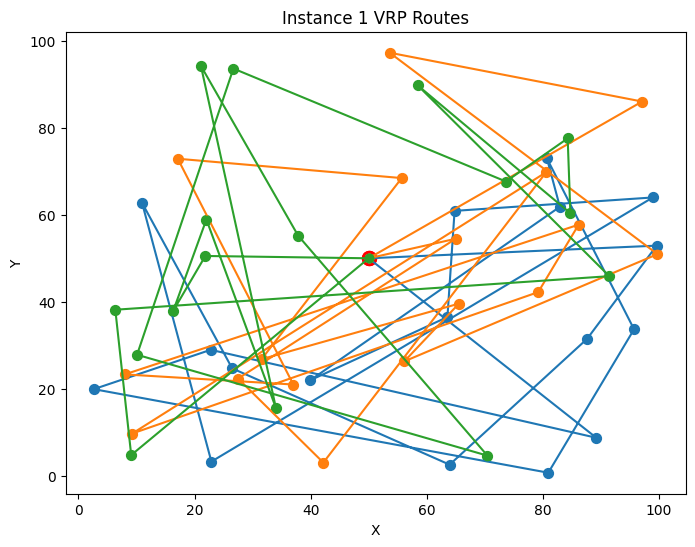

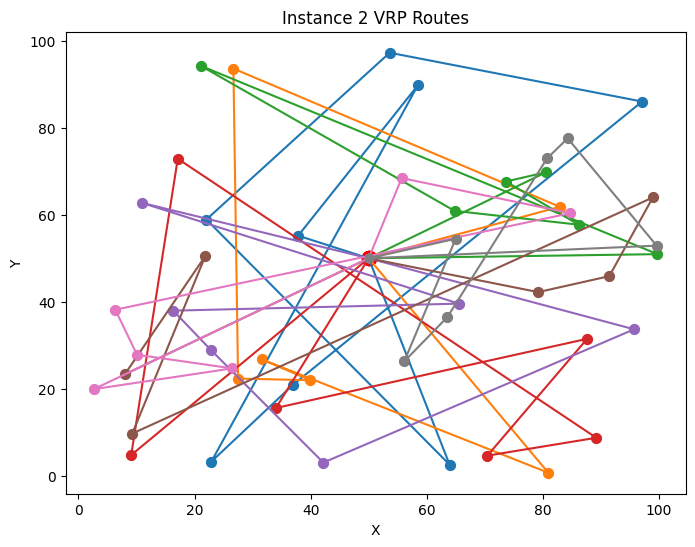

In [28]:
import matplotlib.pyplot as plt

def plot_routes(routes, all_points, title="VRP Routes"):
    plt.figure(figsize=(8,6))
    
    for route in routes:
        x = [all_points[i]['x'] for i in route]
        y = [all_points[i]['y'] for i in route]
        plt.plot(x, y, marker='o')  
        plt.scatter(x[1:-1], y[1:-1], s=50) 
        plt.scatter(x[0], y[0], c='red', s=100, label='Depot')  
    
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Visualization for the Instance 1
plot_routes(best_routes1, all_points, title="Instance 1 VRP Routes")

# Visualization for the Instance 2
plot_routes(best_routes2, all_points, title="Instance 2 VRP Routes")



## Performance Evaluation Metrics

In [31]:
import time

# For the performance metrics, have choosen to evaluate the Solution quality, Computational time and the Convergence rate: 

def genetic_algorithm_convergence(dist_matrix, num_vehicles, customers, pop_size=10, generations=20):
    population = create_population(pop_size, num_vehicles, customers)
    
    best_solution = None
    best_fit = -float('inf')
    best_distances_per_gen = []  # To track convergence
    
    for gen in range(generations):
        new_population = []
        for _ in range(pop_size // 2):
            parent1, parent2 = select_parents(population, dist_matrix)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            
            child1 = mutate(child1)
            child2 = mutate(child2)
            
            new_population.extend([child1, child2])
        
        population = new_population
        
        # Track best solution in current generation
        current_best_dist = float('inf')
        for ind in population:
            f = fitness(ind, dist_matrix)
            dist = 1/f
            if f > best_fit:
                best_fit = f
                best_solution = ind
            if dist < current_best_dist:
                current_best_dist = dist
        
        best_distances_per_gen.append(current_best_dist)
    
    return best_solution, 1/best_fit, best_distances_per_gen
    
# Instance 1
start_time = time.time()
best_routes1, best_dist1, convergence1 = genetic_algorithm_convergence(dist_matrix, instance.vehicles, instance.customers)
time1 = time.time() - start_time
print("Instance 1 - Best Routes:", best_routes1)
print("Instance 1 - Total Distance:", best_dist1)
print("Instance 1 - GA Running Time (s):", time1)
print("Instance 1 - Convergence per Generation:", convergence1)

# Instance 2
start_time = time.time()
best_routes2, best_dist2, convergence2 = genetic_algorithm_convergence(dist_matrix, instance2.vehicles, instance2.customers)
time2 = time.time() - start_time
print("Instance 2 - Best Routes:", best_routes2)
print("Instance 2 - Total Distance:", best_dist2)
print("Instance 2 - GA Running Time (s):", time2)
print("Instance 2 - Convergence per Generation:", convergence2)


Instance 1 - Best Routes: [[0, 7, 40, 4, 10, 13, 22, 19, 16, 37, 28, 31, 25, 34, 1, 49, 46, 43, 0], [0, 8, 20, 50, 11, 26, 32, 2, 23, 14, 29, 17, 35, 38, 41, 44, 47, 5, 0], [0, 3, 9, 36, 27, 15, 18, 6, 24, 12, 30, 33, 21, 39, 42, 45, 48, 0]]
Instance 1 - Total Distance: 2297.3703756535224
Instance 1 - GA Running Time (s): 0.02263808250427246
Instance 1 - Convergence per Generation: [2548.5507589251524, 2531.322733312086, 2448.927201197093, 2554.3048915084614, 2542.1031572576317, 2519.561084149741, 2601.033583882112, 2622.0289032815326, 2530.8853384737104, 2505.301681858589, 2450.5160844611555, 2363.244273003701, 2498.3752336145485, 2528.806359928704, 2505.272690846438, 2506.426126330045, 2489.609329657332, 2370.918839320867, 2366.4309810940777, 2297.3703756535224]
Instance 2 - Best Routes: [[0, 17, 42, 50, 18, 26, 1, 34, 9, 0], [0, 35, 10, 2, 19, 27, 43, 0], [0, 11, 3, 20, 28, 36, 44, 0], [0, 29, 4, 37, 21, 12, 45, 0], [0, 13, 46, 30, 5, 38, 22, 0], [0, 14, 6, 23, 47, 39, 31, 0], [0, 1

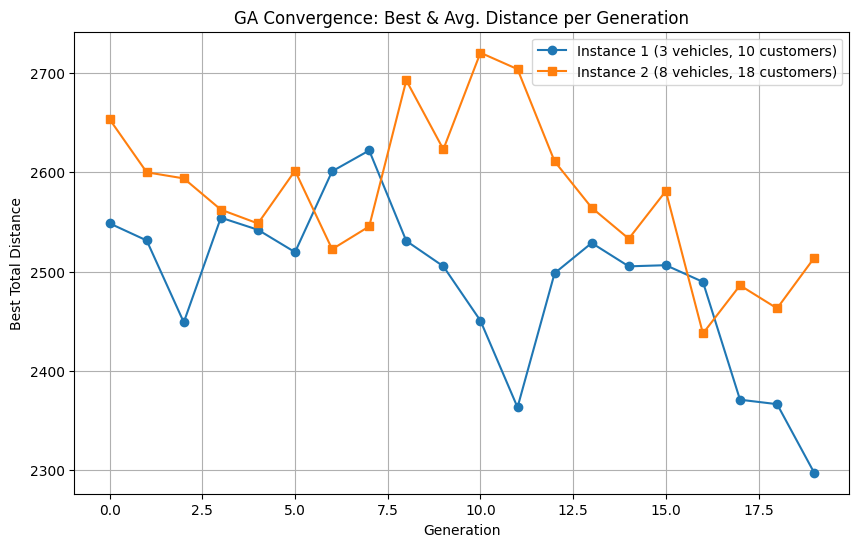

In [33]:
import matplotlib.pyplot as plt

# Visualization of the GA convergence for Instance 1 and 2 
plt.figure(figsize=(10, 6))
plt.plot(convergence1, marker='o', label='Instance 1 (3 vehicles, 10 customers)')
plt.plot(convergence2, marker='s', label='Instance 2 (8 vehicles, 18 customers)')
plt.title('GA Convergence: Best & Avg. Distance per Generation')
plt.xlabel('Generation')
plt.ylabel('Best Total Distance')
plt.legend()
plt.grid(True)
plt.show()
